# Chapter 11. Facets

> These kinds of plots are known as *Trellis* displays. They’re implemented in the **lattice** package as well as in the **ggplot2** package. In **ggplot2**, they’re called *facets*.

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 11.1 Splitting Data into Subplots with Facets

> The choice of faceting direction depends on the kind of comparison you would like to encourage. For example, if you want to compare heights of bars, it’s useful to make the facets go horizontally. If, on the other hand, you want to compare the horizontal distribution of histograms, it makes sense to make the facets go vertically.

> Sometimes both kinds of comparisons are important—there may not be a clear answer as to which faceting direction is best. It may turn out that displaying the groups in a single plot by mapping the grouping variable to an aesthetic like color works better than using facets. In these situations, you’ll have to rely on your judgment.

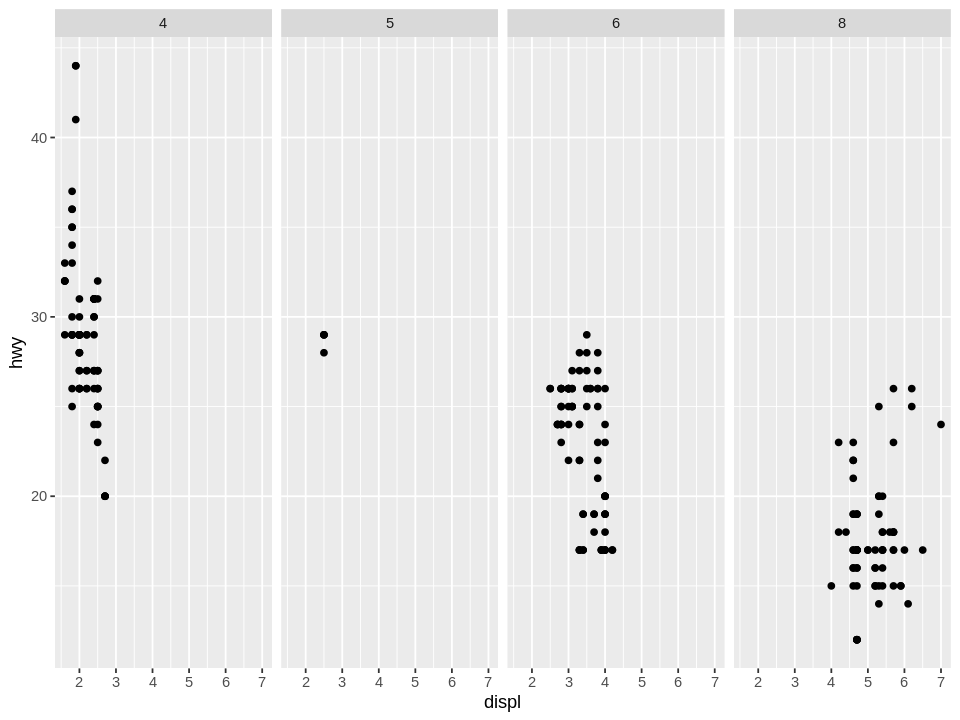

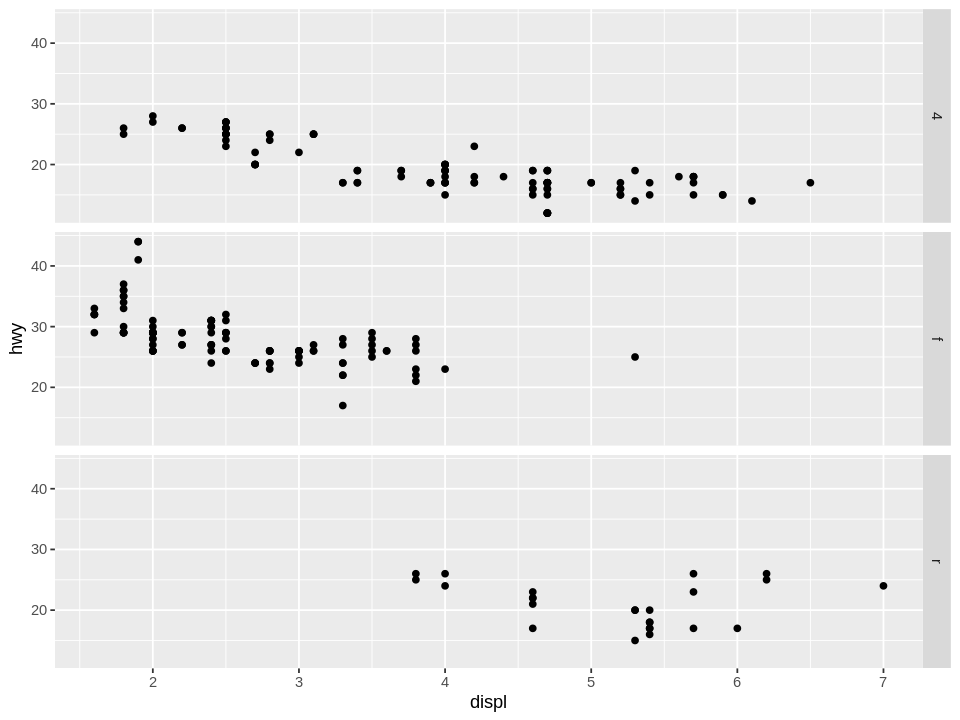

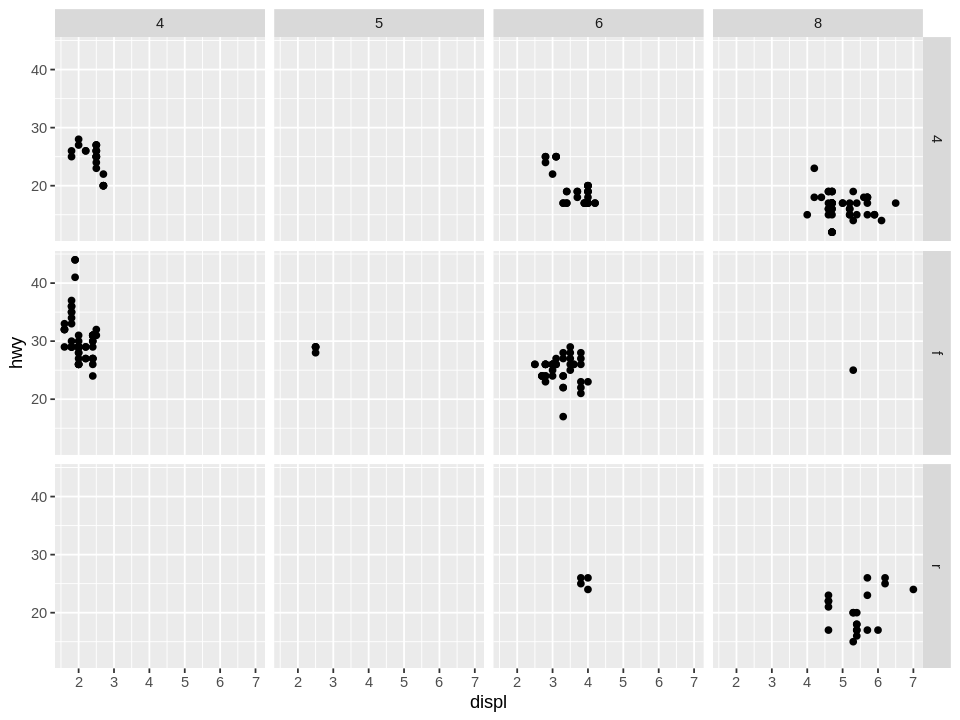

In [2]:
qplot(displ, hwy, data = mpg) + facet_grid(~cyl)
qplot(displ, hwy, data = mpg) + facet_grid(drv ~ .)
qplot(displ, hwy, data = mpg) + facet_grid(drv ~ cyl)

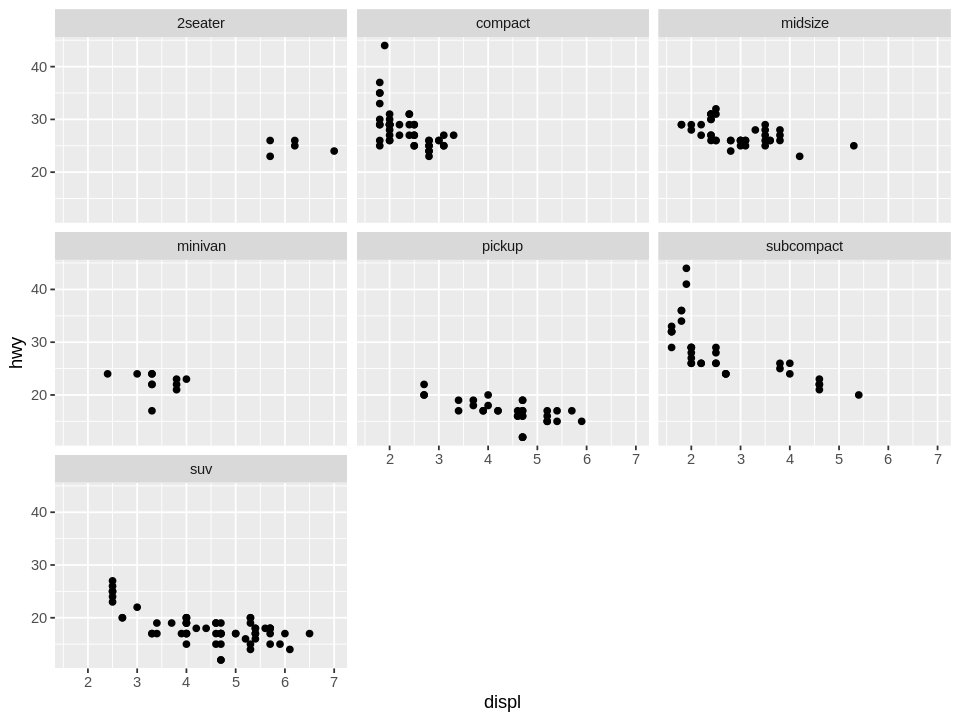

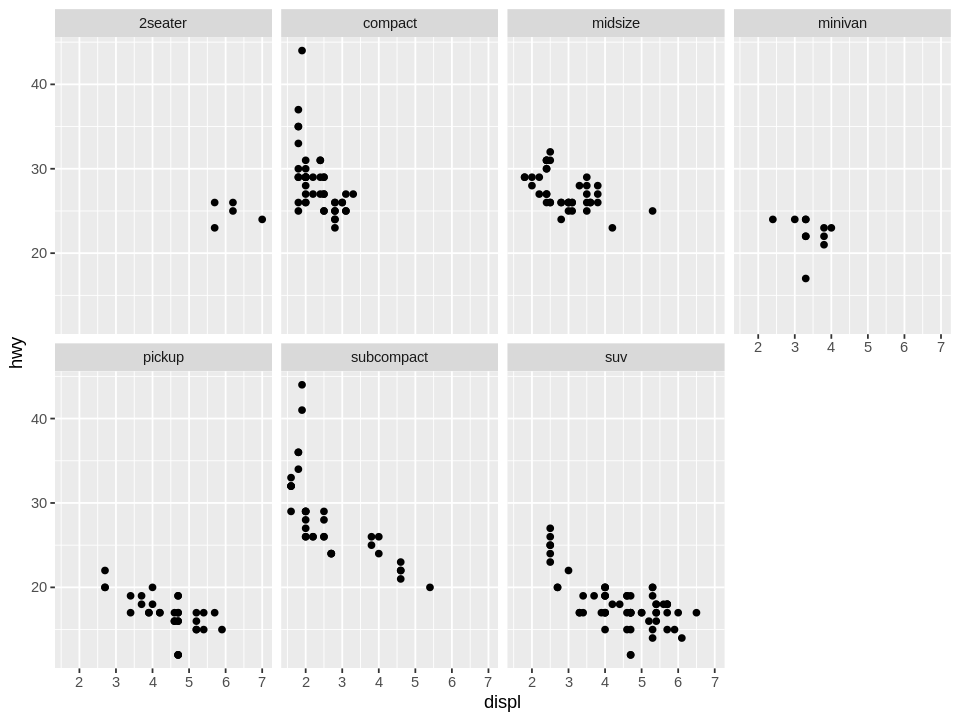

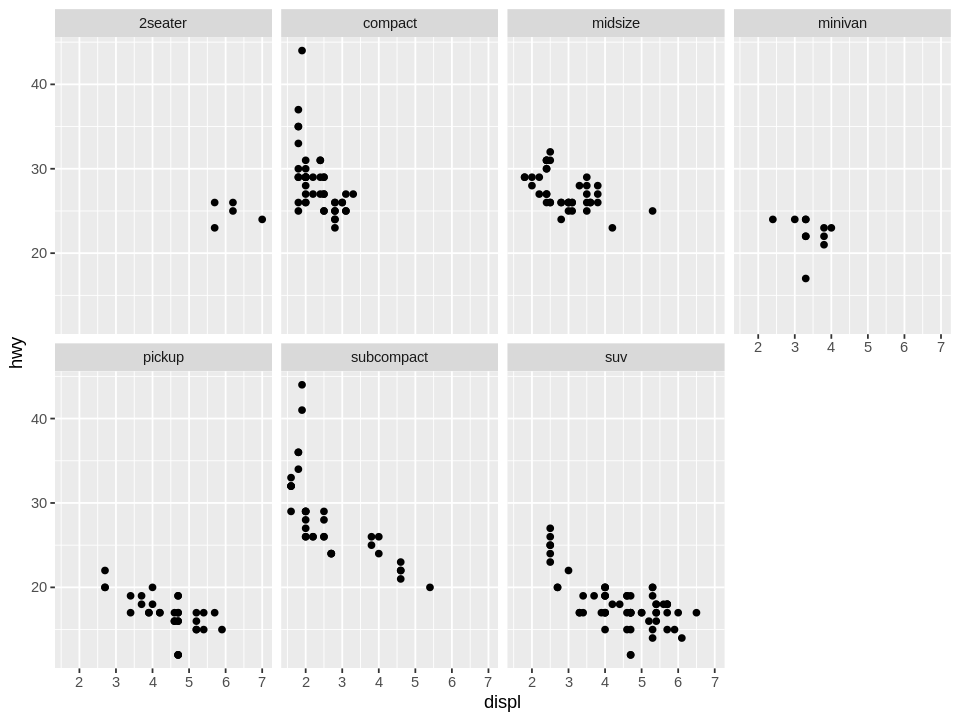

In [3]:
qplot(displ, hwy, data = mpg) + facet_wrap(~class)
qplot(displ, hwy, data = mpg) + facet_wrap(~class, nrow = 2)
qplot(displ, hwy, data = mpg) + facet_wrap(~class, ncol = 4)

## 11.2 Using Facets with Different Axes

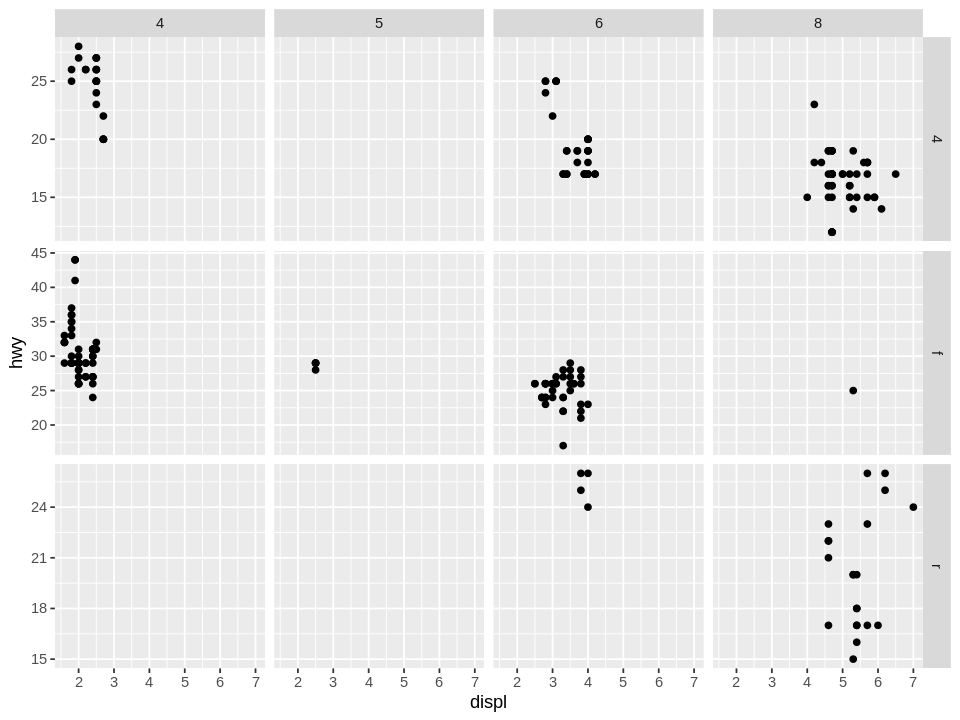

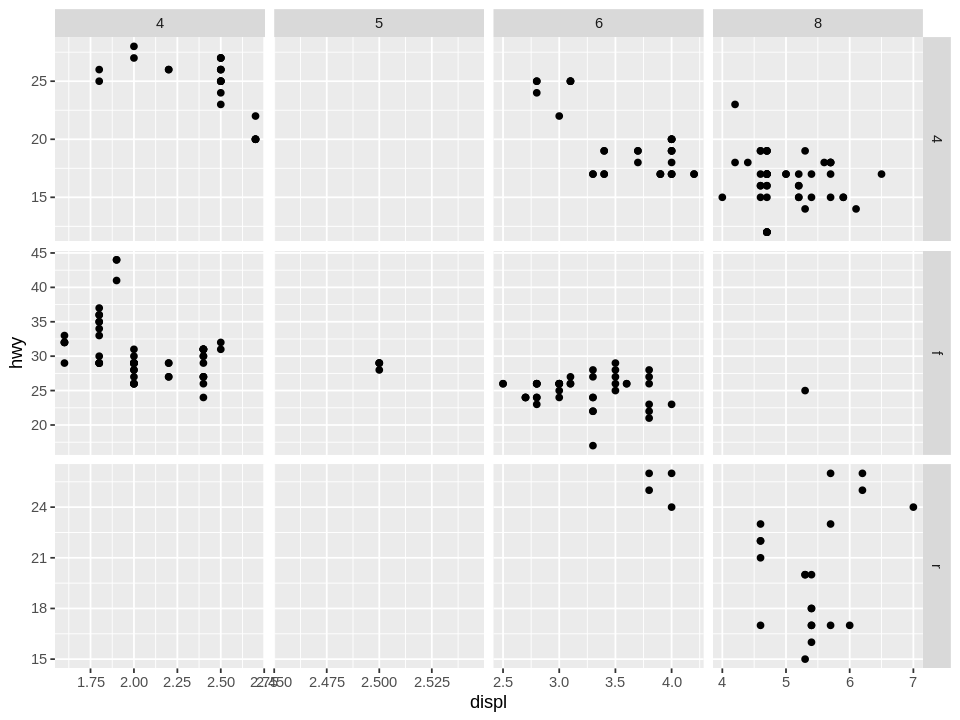

In [4]:
qplot(displ, hwy, data = mpg) + facet_grid(drv ~ cyl, scales = "free_y")
qplot(displ, hwy, data = mpg) + facet_grid(drv ~ cyl, scales = "free")

## 11.3 Changing the Text of Facet Labels

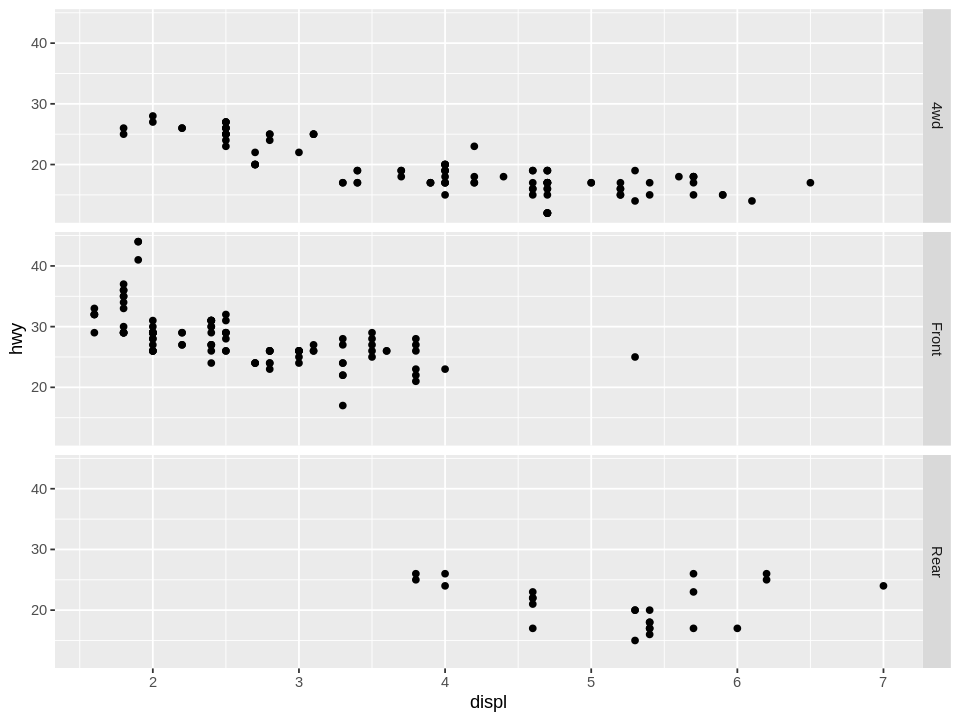

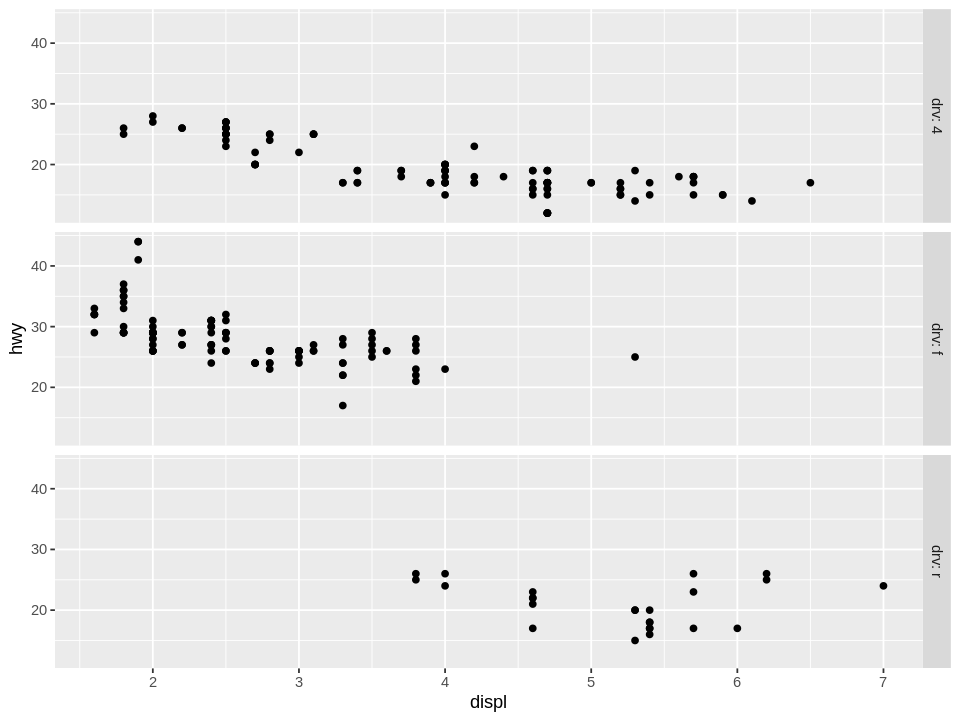

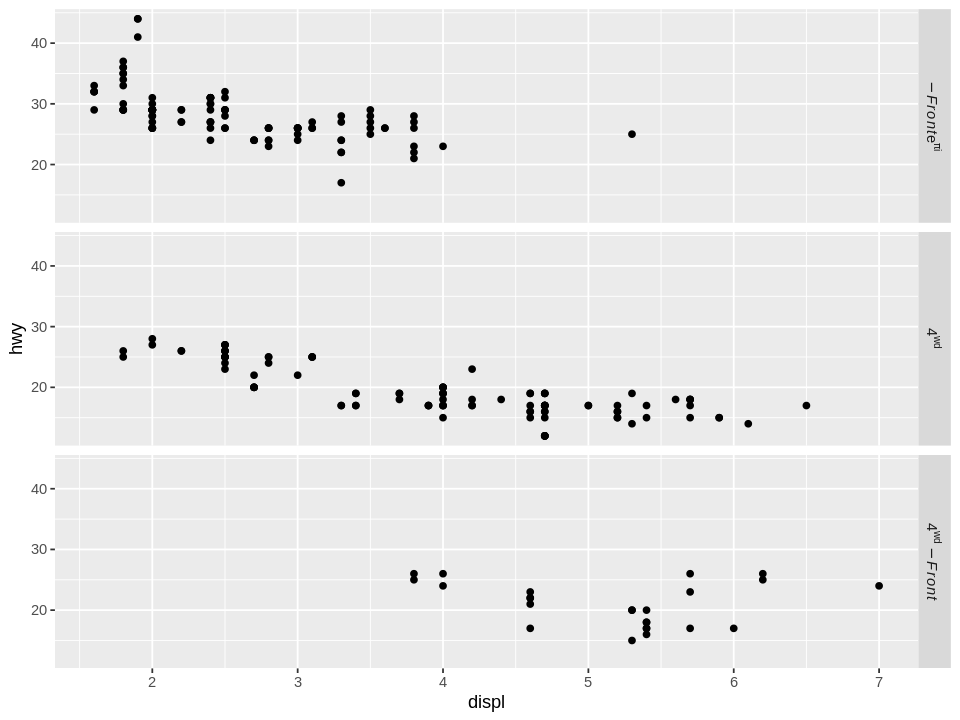

In [5]:
qplot(displ, hwy, data = mpg) +
  facet_grid(
    drv ~ .,
    labeller = labeller(
      drv = c("4" = "4wd", "f" = "Front", "r" = "Rear")
    )
  )

qplot(displ, hwy, data = mpg) +
  facet_grid(drv ~ ., labeller = label_both)

mutate(mpg, drv = recode(
  drv,
  "4" = "4^{ wd }",
  "f" = "-italic(Front) * e^{ pi * i }",
  "r" = "4^{ wd } - italic(Front)"
)) %>%
  qplot(displ, hwy, data = .) +
  facet_grid(drv ~ ., labeller = label_parsed)

## 11.4 Changing the Appearance of Facet Labels and Headers

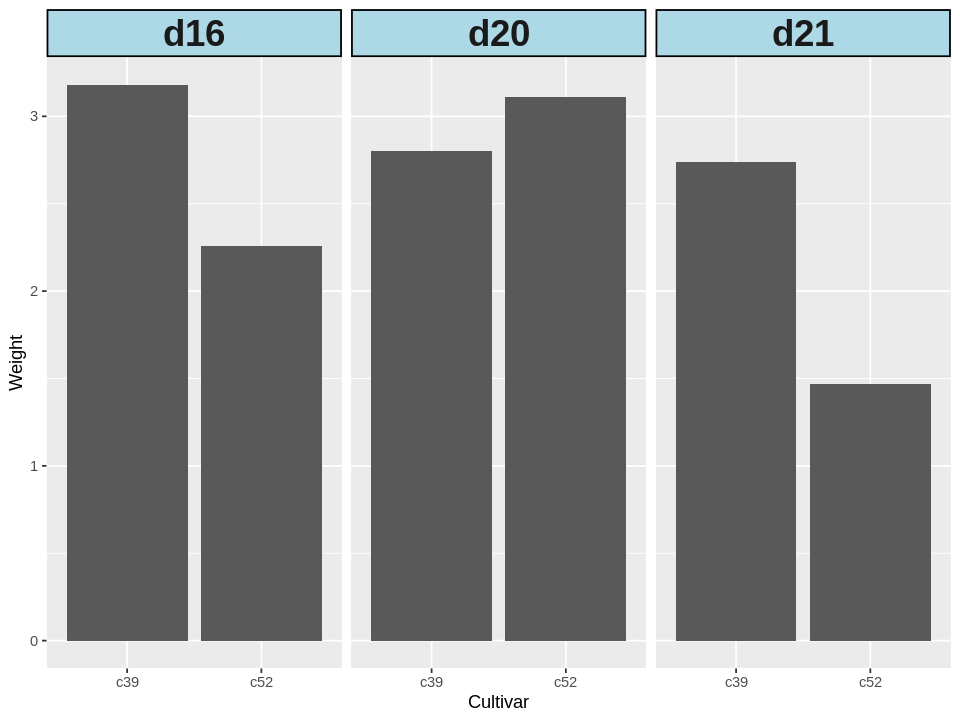

In [6]:
qplot(Cultivar, Weight, data = gcookbook::cabbage_exp, geom = "col") +
  facet_wrap(~Date) +
  theme(
    strip.background = element_rect(
      color = "black",
      fill = "lightblue",
      size = 1
    ),
    strip.text = element_text(
      face = "bold",
      size = rel(2)
    ),
  )